['봉담', 42.75]
['우정', 61.67]
['향남', 50.01]
['남양', 67.38]
['매송', 27.27]
['비봉', 38.55]
['마도', 31.89]
['송산', 58.36]
['서신', 43.27]
['팔탄', 50.95]
['장안', 67.66]
['양감', 31.06]
['정남', 40.67]
['진안', 6.87]
['병점1', 1.45]
['병점2', 1.04]
['반월', 3.96]
['기배', 4.23]
['화산', 11.61]
['동탄2', 2.15]
['동탄1', 5.1]
['동탄3', 2.06]
['동탄4', 4.24]
['동탄5', 11.41]
['새솔', 1.45]
['동탄7', 14.68]
['동탄6', 9.49]
['동탄8', 6.54]
[지역 km^2 총인구수 인구수 / 면적]
['봉담', 42.75, 81903, 1915.86]
['우정', 61.67, 17378, 281.79]
['향남', 50.01, 86960, 1738.85]
['남양', 67.38, 42026, 623.72]
['매송', 27.27, 7085, 259.81]
['비봉', 38.55, 5830, 151.23]
['마도', 31.89, 6952, 218.0]
['송산', 58.36, 10901, 186.79]
['서신', 43.27, 7108, 164.27]
['팔탄', 50.95, 9943, 195.15]
['장안', 67.66, 10268, 151.76]
['양감', 31.06, 3972, 127.88]
['정남', 40.67, 11432, 281.09]
['진안', 6.87, 43916, 6392.43]
['병점1', 1.45, 28987, 19991.03]
['병점2', 1.04, 24402, 23463.46]
['반월', 3.96, 32392, 8179.8]
['기배', 4.23, 13626, 3221.28]
['화산', 11.61, 23269, 2004.22]
['동탄2', 2.15, 35650, 16581.4]
['동탄1',

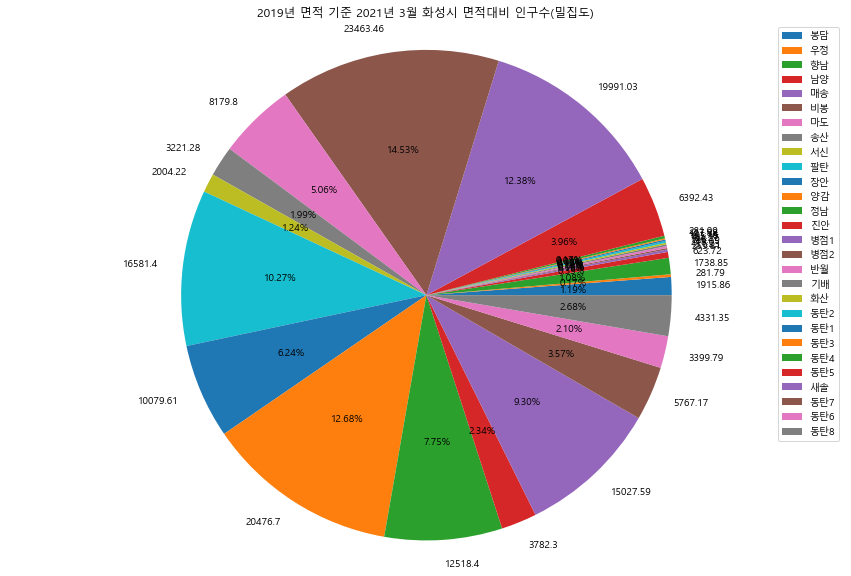

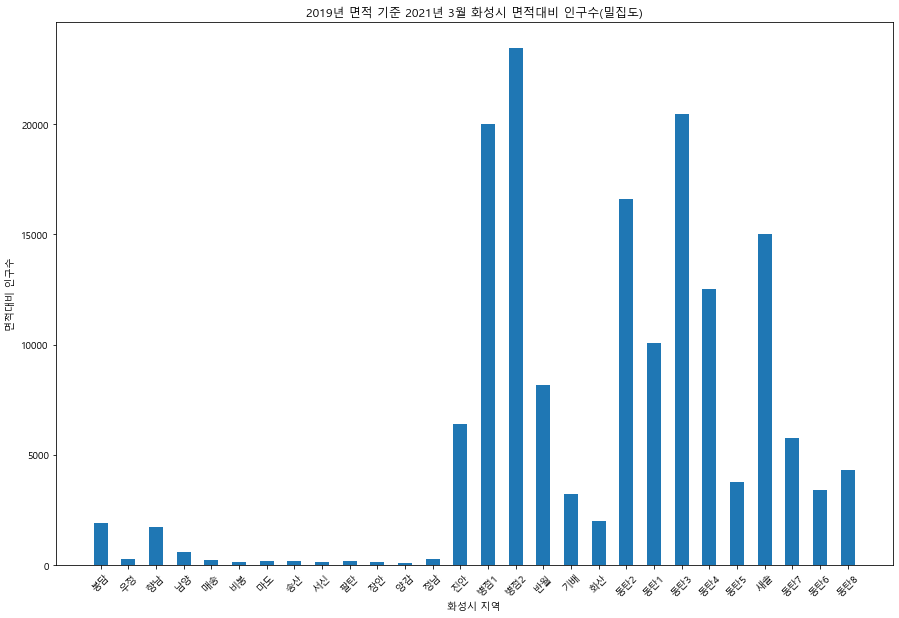

In [83]:
import csv
import matplotlib.pyplot as plt
import re
import numpy as np

f_area = open('.\\SocialLandArea.csv', mode='r', encoding='utf-8')
f_pop = open('.\\pop.csv')

read_area = csv.reader(f_area)
read_pop = csv.reader(f_pop)

next(read_area)
next(read_area)
next(read_area)

data = []
data_string = ''
data_pop = 0.0
data_area = 0.0

city_string = []

for row in read_area : 
    if '화성시' in row[0] :
        break
for i in range(28) :
    row = next(read_area)
    city_str = re.sub(r'\(.*', '', row[0])
    city_str = re.sub(r'\_\_\_', '', city_str)
    city_str = re.sub(r'읍|면|동$', '', city_str)
    city_string.append(city_str)
    row[0] = city_str
    row[1] = float(row[1])
    print(row)
    data.append(row)
for row in read_pop :
    if '화성' in row[0] :
        break

for i in range(28) :
    row = next(read_pop)
    row[0] = row[0].replace('경기도 화성시 ', '')
    row[0] = re.sub(r'\(.*', '', row[0])
    for j in range(28) :
        if data[j][0] in row[0] :
            data_pop = int(row[1].replace(',',''))
            data[j].append(data_pop)
            break

print('[지역', 'km^2', '총인구수', '인구수 / 면적]')
for i in range(28) :
    data[i].append(round((data[i][2] / data[i][1]), 2))
    print(data[i])

data_ratio_str = []
data_ratio = []
data_ratio_city = []
for i in range(28) :
    data_ratio_str.append(str(data[i][3]))
    data_ratio.append(data[i][3])
    data_ratio_city.append(data[i][0])


plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15,10))
plt.title("2019년 면적 기준 2021년 3월 화성시 면적대비 인구수(밀집도)")
plt.pie(data_ratio, labels=data_ratio_str, autopct='%4.2f%%')
plt.legend(city_string)
plt.axis('equal')
plt.savefig('.\\g_pop_per_area_pie.jpg')
plt.show()

### 세대 수 ###
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15,10))
plt.title("2019년 면적 기준 2021년 3월 화성시 면적대비 인구수(밀집도)")
plt.xlabel('화성시 지역')
plt.ylabel('면적대비 인구수')
plt.xticks(rotation=45)
plt.bar(np.arange(len(data_ratio)), data_ratio, tick_label=data_ratio_city, width=0.5)
plt.savefig('.\\g_pop_per_area_bar.jpg')
plt.show()
